Testing graph with 3 nodes and 3 colors


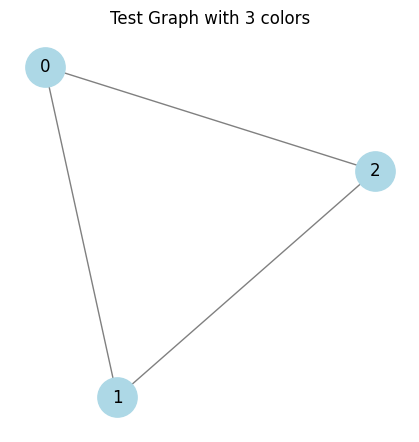

[(0, 1), (0, 2), (1, 2)]
Grover iterations: 3
depth: 176
width: 11
 -> depth * width: 1936
Simulating circuit locally
Number of solutions(cpu): 6 / 64
Optimal grover iterations number: 2.565099660323728
Random guess chance of being correct: 0.09375
Chance of getting a correct result: 0.6767578125
Average "probability" of individual correct outcomes: 0.11279296875
Average "probability" of individual incorrect outcomes: 0.005573141163793103


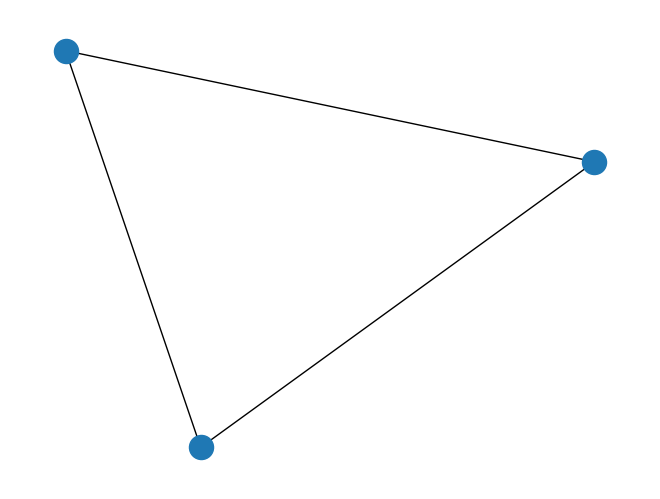

=== CPU Classical solutions ===


KeyError: 'cpu_solutions'

In [1]:
# Imports
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from main import main
import Oracles as oracles
from importlib import reload
reload(oracles)  # Reload to ensure latest changes are used



# Assuming main returns a dictionary including measurement results
# with keys like "counts" (dict of bitstrings to counts), "probabilities" (dict of bitstrings to probs)
# and also CPU valid solutions for comparison.

def plot_graph(G, title="Graph"):
    plt.figure(figsize=(4,4))
    nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800)
    plt.title(title)
    plt.show()

def print_probabilities(prob_dict, max_to_show=20):
    print(f"Showing top {max_to_show} states by probability:")
    sorted_probs = sorted(prob_dict.items(), key=lambda x: x[1], reverse=True)
    for bitstring, prob in sorted_probs[:max_to_show]:
        print(f"State {bitstring} -> Probability {prob:.5f}")

def analyze_and_print_results(data):
    print("=== CPU Classical solutions ===")
    for sol in data["cpu_solutions"]:
        print(sol)
    print(f"Total classical solutions: {len(data['cpu_solutions'])}")
    
    print("\n=== Quantum Measurement Results (counts) ===")
    for bitstring, count in sorted(data["counts"].items(), key=lambda x: -x[1])[:20]:
        print(f"State {bitstring}: Count {count}")
    
    print("\n=== Quantum Measurement Probabilities ===")
    print_probabilities(data["probabilities"])
    
    print("\nProbabilities of classical solution states:")
    for sol in data["cpu_solutions"]:
        bitstring = data["solution_to_bitstring"](sol)
        prob = data["probabilities"].get(bitstring, 0)
        print(f"Solution state {bitstring}: Probability {prob:.5f}")

def test_graph(G, k, grover_iterations=2):
    print(f"Testing graph with {len(G.nodes())} nodes and {k} colors")
    plot_graph(G, title=f"Test Graph with {k} colors")
    
    data = main(k=k, graph=G, run='local', grover_iterations=grover_iterations, print_circuit=False)
    
    analyze_and_print_results(data)

# Now test some graphs:
triangle = nx.complete_graph(3)
square = nx.cycle_graph(4)
bipartite = nx.complete_bipartite_graph(2, 3)
single_node = nx.empty_graph(1)

# Run tests
test_graph(triangle, k=3, grover_iterations=3)
test_graph(square, k=2, grover_iterations=3)
test_graph(bipartite, k=2, grover_iterations=4)
test_graph(single_node, k=2, grover_iterations=1)
